# Project 3: Web APIs & NLP

## Notebook #3:
## Classification Model - Random Forest & Count Vectorizer

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
submissions = pd.read_csv('./data/submissions_model.csv').drop('Unnamed: 0', axis=1)

In [3]:
submissions.head()

,author,text,created,subreddit,text_tokenized,text_lemmatized,sentiment,sentiment_compound
0,jeremyparnaby,Grealish should be joining within the week: Ka...,2021-07-24 22:34:33,1,"['Grealish', 'should', 'be', 'joining', 'withi...","['Grealish', 'should', 'be', 'joining', 'withi...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
1,UneducatedSlob,How many of them can you name?:,2021-07-24 18:58:06,1,"['How', 'many', 'of', 'them', 'can', 'you', 'n...","['How', 'many', 'of', 'them', 'can', 'you', 'n...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
2,_conjohn,"Awww shit, here we go again: [Nick Harris] Whe...",2021-07-24 18:34:04,1,"['Awww', 'shit', 'here', 'we', 'go', 'again', ...","['Awww', 'shit', 'here', 'we', 'go', 'again', ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
3,AutoModerator,[Daily Discussion] Saturday 24 July 2021: This...,2021-07-24 17:00:14,1,"['Daily', 'Discussion', 'Saturday', '24', 'Jul...","['Daily', 'Discussion', 'Saturday', '24', 'Jul...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
4,tquad24,On this day 10 years ago:,2021-07-24 14:49:55,1,"['On', 'this', 'day', '10', 'years', 'ago']","['On', 'this', 'day', '10', 'years', 'ago']","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0


In [4]:
X = submissions['text_lemmatized']
y = submissions['subreddit']

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 42, stratify=y)

In [6]:
# Instantiate Count Vectorizer object for submissions dataframe
cvec = CountVectorizer(stop_words='english')

In [7]:
cvec.fit(X_train)

CountVectorizer(stop_words='english')

In [8]:
X_train = cvec.transform(X_train)

In [9]:
# random forest
rf = RandomForestClassifier(n_estimators=100)

In [10]:
# cross val random forest
cross_val_score(rf, X_train, y_train,cv = 5).mean()

0.8861110133436151

In [11]:
# feature importances
rf.fit(X_train, y_train)
rf.feature_importances_

array([8.90579574e-05, 8.85705743e-05, 0.00000000e+00, ...,
       5.20195035e-09, 0.00000000e+00, 1.06391730e-06])

In [12]:
# train score
rf.score(X_train, y_train)

0.9921588987845628

In [13]:
X_val = cvec.transform(X_val)

In [14]:
# test score
rf.score(X_val, y_val)

0.8856983106354087

In [17]:
# Get predictions
preds = rf.predict(X_train)

# Save confusion matrix values
cm = confusion_matrix(y_train, preds)
tn, fp, fn, tp = cm.ravel()

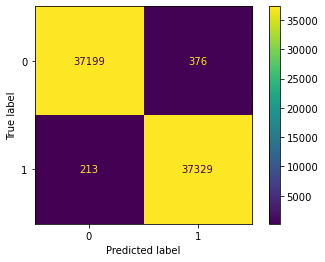

In [18]:
# View confusion matrix

ConfusionMatrixDisplay(cm).plot();


In [19]:
# Get predictions
preds = rf.predict(X_val)

# Save confusion matrix values
cm = confusion_matrix(y_val, preds)
tn, fp, fn, tp = cm.ravel()

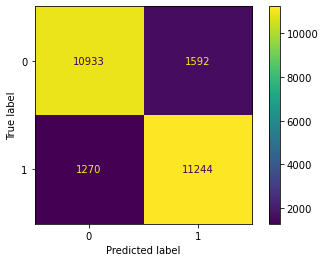

In [20]:
# View confusion matrix

ConfusionMatrixDisplay(cm).plot();


In [21]:
# Accuracy
accuracy = (tp + tn) / (tn + fp + fn + tp)

# What is the test specificity of our model?
spec = tn / (tn + fp)

#Sensitivity
sens = tp / (tp + fn)

# By hand
prec = tp / (tp + fp)

In [22]:
accuracy

0.8856983106354087

In [23]:
spec

0.8728942115768463

In [24]:
sens

0.898513664695541

In [25]:
prec

0.8759738236210658